In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr

In [2]:
df_inter=pd.read_csv('C:/Users/User/Desktop/T/interactiondata.csv')
df_order=pd.read_csv('C:/Users/User/Desktop/T/orderdata.csv')
df_user=pd.read_csv('C:/Users/User/Desktop/T/userdata.csv')

In [78]:
# join_datetime — время регистрации пользователя
# age — возраст
# income — доход
# kids — число детей клиента (0-12 лет)
# teenagers — число детей клиента (13-17 лет)
# marital — семейное положение клиента
# education — уровень образования клиента
# category — категория заказанных продуктов
# avg_bill — средний чек по категории
# complain_count — число жалоб от пользователя за последние 3 месяца
# last_order_dt -—дата последнего заказа
# discount_purchases_count_avg — среднее число заказов, в которых хотя бы 1 товар со скидкой (в месяц)
# catalogue_purchases_count_avg — среднее число заказов при помощи онлайн-каталога (в месяц)
# store_purchases_count_avg — среднее число заказов в очных магазинах (в месяц)
# website_purchases_count_avg — среднее число заказов сделанных с сайта (в месяц)
# website_visit_count_avg — среднее число посещений сайта (в месяц)
# mobile_purchases_count_avg — среднее число заказов сделанных в мобильном приложении (в месяц)
# mobile_visit_count_avg — среднее число посещений мобильного приложения (в месяц)
# marketing_company_outcome_<N> — исход N-ой рекламной кампании (сделал ли пользователь значимое для бизнеса действие после перехода по ссылке в рекламе на сайт/мобильное приложение сервиса)

In [79]:
#Обработка данных

In [3]:
df_inter.rename(columns = {'UserId':'userid'}, inplace = True)
df_order.rename(columns = {'userId':'userid'}, inplace = True)

In [4]:
df_merg = pd.merge(df_inter, df_order, on='userid', how='outer')
df_merg = pd.merge(df_merg, df_user, on='userid', how='outer')

In [82]:
#Описание данных

In [5]:
df_merg.dtypes

userid                            object
complain_count                     int64
last_order_dt                     object
discount_purchases_count_avg       int64
catalogue_purchases_count_avg      int64
store_purchases_count_avg          int64
website_purchases_count_avg        int64
website_visit_count_avg            int64
mobile_purchases_count_avg         int64
mobile_visit_count_avg             int64
marketing_company_outcome_1        int64
marketing_company_outcome_2        int64
marketing_company_outcome_3        int64
marketing_company_outcome_4        int64
marketing_company_outcome_5        int64
category                          object
avg_bill                         float64
join_datetime                     object
age                                int64
income                           float64
kids                               int64
teenagers                          int64
marital                           object
education                         object
dtype: object

In [6]:
df_merg['last_order_dt'] = pd.to_datetime(df_merg['last_order_dt'], errors='coerce')
df_merg['join_datetime'] = pd.to_datetime(df_merg['join_datetime'], errors='coerce')

In [7]:
df_merg.describe()

,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,marketing_company_outcome_3,marketing_company_outcome_4,marketing_company_outcome_5,avg_bill,join_datetime,age,income,kids,teenagers
count,23835.000000,23387,23835.000000,23835.000000,23835.000000,23835.000000,23835.000000,23835.000000,23835.000000,23835.000000,23835.000000,23835.000000,23835.000000,23835.000000,22814.000000,23835,23835.000000,23835.000000,23835.000000,23835.000000
mean,0.579736,2024-06-20 04:26:21.801855744,3.810866,2.064023,4.537739,3.281057,5.902203,11.004405,27.441703,0.216740,0.188253,0.230543,0.214097,0.224670,506.814105,2023-06-02 20:14:01.811453696,38.973275,65902.699266,0.291336,0.328047
min,0.000000,2024-05-11 00:00:00,0.000000,-1.000000,0.000000,-3.000000,0.000000,-2.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-283.000000,2022-04-28 02:21:31,11.000000,25500.000000,0.000000,0.000000
25%,0.000000,2024-06-09 00:00:00,1.000000,0.000000,2.000000,1.000000,3.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,2022-12-19 05:46:30,19.000000,39918.000000,0.000000,0.000000
50%,0.000000,2024-06-27 00:00:00,2.000000,1.000000,4.000000,2.000000,6.000000,8.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,248.000000,2023-06-09 14:39:28,42.000000,66020.000000,0.000000,0.000000
75%,1.000000,2024-07-02 00:00:00,4.000000,4.000000,6.000000,5.000000,8.000000,16.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,794.000000,2023-11-18 02:49:33,54.000000,84322.000000,1.000000,1.000000
max,8.000000,2024-07-09 00:00:00,29.000000,28.000000,13.000000,27.000000,20.000000,59.000000,119.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3612.000000,2024-06-05 22:25:13,80.000000,279029.000000,2.000000,2.000000
std,0.825030,NaN,5.197030,2.671713,3.327277,2.875651,3.704678,12.013765,26.552142,0.412033,0.390922,0.421189,0.410203,0.417373,629.378754,NaN,19.066670,32116.251296,0.483206,0.500398


In [8]:
# Вычисление среднего чека по категориям
avg_bill_by_category = df_merg.groupby('category')['avg_bill'].mean().reset_index()
avg_bill_by_category = avg_bill_by_category.sort_values(by='avg_bill', ascending=False)
print("Средний чек по категориям товаров:")
print(avg_bill_by_category)

Средний чек по категориям товаров:
     category    avg_bill
1        fish  790.104552
6  vegetables  724.891043
2      fruits  614.074890
0     alcohol  609.717768
4       other  394.406167
3        meat  183.994128
5      sweets  133.711601


In [9]:
df_user_income = df_merg['income'].mean()

df_merg['income_level'] = df_merg['income'].apply(lambda x: 'high' if x > df_user_income else 'low')

category_income_distribution = df_merg.groupby(['income_level', 'category']).size().unstack()

print("Распределение категорий товаров по уровню дохода:")
print(category_income_distribution)

Распределение категорий товаров по уровню дохода:
category      alcohol  fish  fruits  meat  other  sweets  vegetables
income_level                                                        
high             1706  1706    1706  1706   1706    1706        1706
low              1699  1699    1699  1699   1699    1699        1699


In [10]:
age_counts_negative_alcohol = df_merg.loc[(df_merg['category'] == 'alcohol') & (df_merg['avg_bill'] < 0), 'age'].value_counts()

print("Количество уникальных значений возраста среди клиентов с отрицательным средним чеком в категории 'alcohol':")
print(age_counts_negative_alcohol)

Количество уникальных значений возраста среди клиентов с отрицательным средним чеком в категории 'alcohol':
age
15    115
17    105
13    104
14    102
12    102
18     94
11     90
16     88
42     20
44     19
45     16
41     15
50     15
34     14
47     13
35     12
49     11
31     10
48     10
32      9
40      8
33      8
46      8
43      8
39      8
61      8
51      7
38      7
37      7
36      7
64      5
55      5
60      4
62      4
30      4
54      4
28      3
63      3
59      3
53      3
69      3
68      2
57      2
70      2
52      2
29      2
73      2
24      2
25      2
71      2
75      1
74      1
67      1
66      1
Name: count, dtype: int64


In [12]:
no_alco_kids = df_merg[(df_merg['age'] < 18) & (df_merg['category'] == 'alcohol')]['userid'].unique()

# Удалить записи с найденными user_id из датафрейма
df_merg = df_merg[~df_merg['userid'].isin(no_alco_kids)]

print(f"Удалено {len(no_alco_kids)} пользователей младше 18 лет, которые покупали алкоголь.")

Удалено 706 пользователей младше 18 лет, которые покупали алкоголь.


In [14]:
df_merg.describe()

,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,marketing_company_outcome_3,marketing_company_outcome_4,marketing_company_outcome_5,avg_bill,join_datetime,age,income,kids,teenagers
count,18893.000000,18557,18893.00000,18893.000000,18893.000000,18893.000000,18893.000000,18893.000000,18893.000000,18893.000000,18893.000000,18893.000000,18893.000000,18893.000000,17872.000000,18893,18893.000000,18893.000000,18893.000000,18893.000000
mean,0.583179,2024-06-20 13:16:51.693700864,4.17488,2.603927,5.456095,3.887366,6.405706,13.255280,28.414227,0.141904,0.098555,0.154872,0.145980,0.147833,601.208706,2023-06-04 05:13:49.080770816,45.495369,76270.515376,0.367544,0.413857
min,0.000000,2024-05-11 00:00:00,0.00000,-1.000000,0.000000,-3.000000,0.000000,-2.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-283.000000,2022-04-28 02:21:31,18.000000,25501.000000,0.000000,0.000000
25%,0.000000,2024-06-10 00:00:00,1.00000,0.000000,3.000000,2.000000,4.000000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,2022-12-23 19:46:19,34.000000,59554.000000,0.000000,0.000000
50%,0.000000,2024-06-27 00:00:00,2.00000,2.000000,5.000000,3.000000,6.000000,11.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,338.000000,2023-06-11 03:14:33,47.000000,71898.000000,0.000000,0.000000
75%,1.000000,2024-07-03 00:00:00,4.00000,4.000000,7.000000,6.000000,8.000000,18.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,936.000000,2023-11-22 11:44:45,58.000000,91648.000000,1.000000,1.000000
max,8.000000,2024-07-09 00:00:00,29.00000,28.000000,13.000000,27.000000,20.000000,59.000000,119.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3612.000000,2024-06-05 17:46:58,80.000000,279029.000000,2.000000,2.000000
std,0.839506,NaN,5.71615,2.756694,3.119275,2.912900,3.783253,12.526364,28.856776,0.348961,0.298072,0.361792,0.353096,0.354943,671.801077,NaN,15.888864,27977.999440,0.516291,0.529515


In [15]:
abs_values = df_merg[['catalogue_purchases_count_avg', 'website_purchases_count_avg', 'mobile_purchases_count_avg', 'mobile_visit_count_avg', 'avg_bill']]
df_merg[['catalogue_purchases_count_avg', 'website_purchases_count_avg', 'mobile_purchases_count_avg', 'mobile_visit_count_avg', 'avg_bill']] = abs_values.abs()

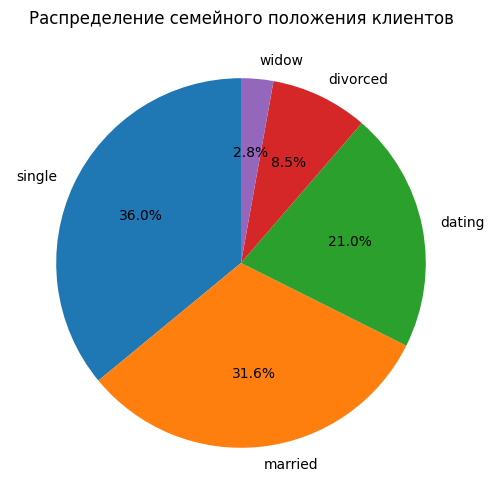

In [16]:
plt.figure(figsize=(8, 6))
df_merg['marital'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Распределение семейного положения клиентов')
plt.ylabel('')
plt.show()

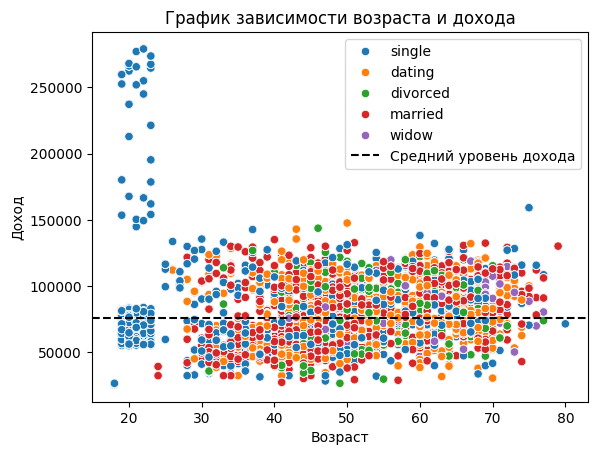

In [17]:
sns.scatterplot(data=df_merg, x='age', y='income',hue='marital')
line_mean = df_merg['income'].mean()
plt.axhline(y=line_mean, color='black', linestyle='--', label='Cредний уровень дохода')
plt.xlabel("Возраст")
plt.ylabel("Доход")
plt.title("График зависимости возраста и дохода")
plt.legend()
plt.show()

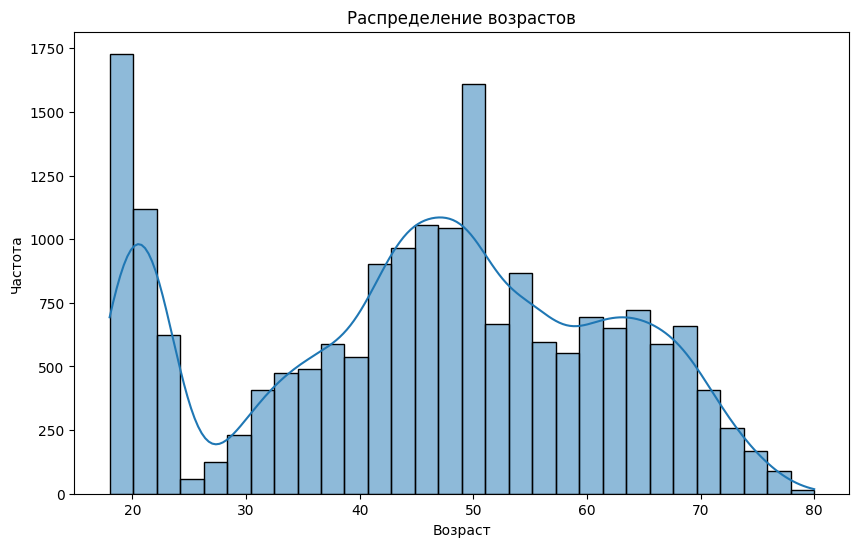

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df_merg['age'], bins=30, kde=True)
plt.title('Распределение возрастов')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

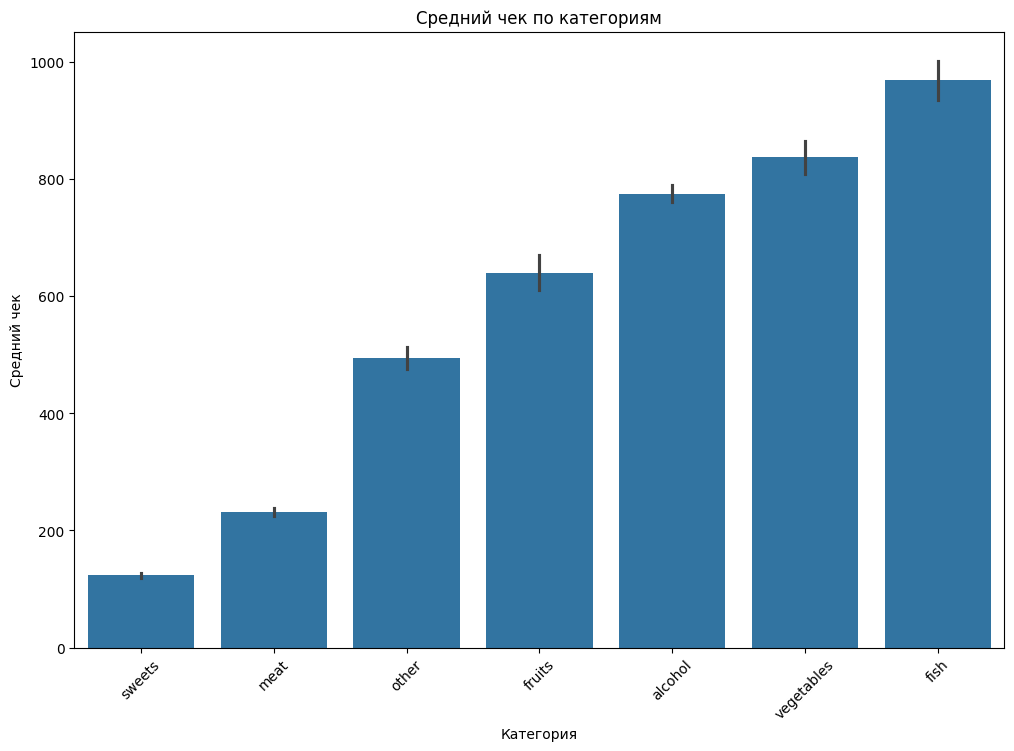

In [19]:
plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='avg_bill', data=df_merg, order=df_merg.groupby('category')['avg_bill'].mean().sort_values().index)
plt.title('Средний чек по категориям')
plt.xlabel('Категория')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)
plt.show()

In [20]:
df_no_user = df_merg.drop(['userid'],axis=1)
df_no_user

,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,...,category,avg_bill,join_datetime,age,income,kids,teenagers,marital,education,income_level
7,0,2024-06-18,1,0,0,1,8,2,4,0,...,meat,108.0,2023-09-23 22:12:48,18,26232.0,0,0,single,masters,low
8,0,2024-06-18,1,0,0,1,8,2,4,0,...,sweets,344.0,2023-09-23 22:12:48,18,26232.0,0,0,single,masters,low
9,0,2024-06-18,1,0,0,1,8,2,4,0,...,other,24.0,2023-09-23 22:12:48,18,26232.0,0,0,single,masters,low
10,0,2024-06-18,1,0,0,1,8,2,4,0,...,vegetables,210.0,2023-09-23 22:12:48,18,26232.0,0,0,single,masters,low
11,0,2024-06-18,1,0,0,1,8,2,4,0,...,alcohol,10.0,2023-09-23 22:12:48,18,26232.0,0,0,single,masters,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23830,2,2024-06-06,1,0,2,1,7,10,18,0,...,sweets,14.0,2022-08-27 10:56:43,46,59421.0,1,0,married,bachelor,low
23831,2,2024-06-06,1,0,2,1,7,10,18,0,...,meat,63.0,2022-08-27 10:56:43,46,59421.0,1,0,married,bachelor,low
23832,2,2024-06-06,1,0,2,1,7,10,18,0,...,alcohol,10.0,2022-08-27 10:56:43,46,59421.0,1,0,married,bachelor,low
23833,2,2024-06-06,1,0,2,1,7,10,18,0,...,other,12.0,2022-08-27 10:56:43,46,59421.0,1,0,married,bachelor,low


In [24]:
categorical_cols = df_no_user.select_dtypes(include=['object']).columns
df = pd.get_dummies(df_no_user, columns=categorical_cols, drop_first=True)
df = df.drop(['income_level_low'],axis=1)
df.dtypes

complain_count                            int64
last_order_dt                    datetime64[ns]
discount_purchases_count_avg              int64
catalogue_purchases_count_avg             int64
store_purchases_count_avg                 int64
website_purchases_count_avg               int64
website_visit_count_avg                   int64
mobile_purchases_count_avg                int64
mobile_visit_count_avg                    int64
marketing_company_outcome_1               int64
marketing_company_outcome_2               int64
marketing_company_outcome_3               int64
marketing_company_outcome_4               int64
marketing_company_outcome_5               int64
avg_bill                                float64
join_datetime                    datetime64[ns]
age                                       int64
income                                  float64
kids                                      int64
teenagers                                 int64
category_fish                           

In [25]:
df_corr = df.corr()
threshold = 0.6

high_corr = df_corr[(df_corr.abs() > threshold) & (df_corr != 1)]

strong_corr_pairs = []
for i in range(len(high_corr.columns)):
    for j in range(i):
        if abs(high_corr.iloc[i, j]) > threshold:
            pair = (high_corr.index[i], high_corr.columns[j], high_corr.iloc[i, j])
            strong_corr_pairs.append(pair)

df_high_corr = pd.DataFrame(strong_corr_pairs, columns=['Value1', 'Value2', 'Correlation'])

df_high_corr = df_high_corr.reindex(df_high_corr.Correlation.abs().sort_values(ascending=False).index)
df_high_corr

,Value1,Value2,Correlation
3,mobile_visit_count_avg,mobile_purchases_count_avg,0.828688
1,mobile_visit_count_avg,discount_purchases_count_avg,0.679133
2,mobile_visit_count_avg,website_visit_count_avg,0.624121
0,website_visit_count_avg,discount_purchases_count_avg,0.604040


In [94]:
#№3 Формирование гипотез

In [95]:
#Гипотеза 1: Пользователи, которые чаще посещают мобильное приложение, чаще совершают покупки через него.
#Гипотеза 2: Пользователи с высоким доходом чаще совершают покупки в офлайн-магазинах.
#Гипотеза 3: Молодые пользователи чаще находятся в статусе single.
#Гипотеза 4: Пользователи, которые чаще посещают мобильное приложение, также чаще покупают товары со скидками.
#Гипотеза 5: Пользователи с высоким доходом чаще совершают покупки через каталог.
#Гипотеза 6: Пользователи, которые чаще совершают покупки в офлайн-магазинах, также чаще совершают покупки через каталог.

In [96]:
# №4 Выбор значимых для бизнеса выводов и их подтверждение

In [97]:
#Использую тест Пирсона, потому что он подходит для проверки гипотез о наличии линейной корреляционной связи между переменными,
#тогда как t-тест используется для проверки различий между средними значениями групп

In [98]:
#Проверка 1 гипотезы
x = df['mobile_visit_count_avg']
y = df['mobile_purchases_count_avg']

corr, p_value = pearsonr(x, y)

print(f'Корреляция: {corr:.4f}')
print(f'P-value: {p_value:.4f}')

if p_value < 0.05:
    print('Корреляция статистически значима')
else:
    print('Нет статистически значимой корреляции')

Корреляция: 0.7686
P-value: 0.0000
Корреляция статистически значима


In [26]:
#Проверка 2 гипотезы
x = df['mobile_visit_count_avg']
y = df['discount_purchases_count_avg']

corr, p_value = pearsonr(x, y)

print(f'Корреляция: {corr:.4f}')
print(f'P-value: {p_value:.4f}')

if p_value < 0.05:
    print('Корреляция статистически значима')
else:
    print('Нет статистически значимой корреляции')

Корреляция: 0.6791
P-value: 0.0000
Корреляция статистически значима


In [100]:
#Проверка 3 гипотезы
x = df['mobile_visit_count_avg']
y = df['website_visit_count_avg']

corr, p_value = pearsonr(x, y)

print(f'Корреляция: {corr:.4f}')
print(f'P-value: {p_value:.4f}')

if p_value < 0.05:
    print('Корреляция статистически значима')
else:
    print('Нет статистически значимой корреляции')

Корреляция: -0.6874
P-value: 0.0000
Корреляция статистически значима


In [101]:
#Проверка 4 гипотезы
x = df['mobile_visit_count_avg']
y = df['discount_purchases_count_avg']

corr, p_value = pearsonr(x, y)

print(f'Корреляция: {corr:.4f}')
print(f'P-value: {p_value:.4f}')

if p_value < 0.05:
    print('Корреляция статистически значима')
else:
    print('Нет статистически значимой корреляции')

Корреляция: 0.6555
P-value: 0.0000
Корреляция статистически значима


In [104]:
#№5 Описание маркетингового/стратегического решения на основе выбранных выводов

In [106]:
# Маркетинговая компания включает в себя:
# • Создание промоакций, возможность комбинирование скидок и программа лояльности, которые будут доступными через мобильное приложение и веб-сайт.
# • Проведения A/B тестов с целью улучшения веб-сайта и мобильного приложения

In [107]:
# №6 Расчет бюджета на реализацию решения
#Формула=затраты_на_создание_и_проводение_промоакции,скидок_и_создание_программы_лояльности+
#+продвижение_рекламной_компании_через_мобильное_приложение_и_веб-сайт

In [108]:
# №7 Ожидаемые результаты
# Результатом проведения маркетинговой компании станет увеличение дохода компании за счёт: 
# • Повышения активности и числа покупок через мобильное приложение и веб-сайт